<a href="https://colab.research.google.com/github/vmprakash-swaminathan/NAN-MUDHALVAN-ORACLE/blob/main/Exploratory_Data_Analysis_for_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory Data Analysis for Customer Churn Prediction

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold

Load the preprocessed dataset

In [ ]:
data_path = './processed_telco_churn.csv'
df = pd.read_csv(data_path)

Overview of the Data

In [ ]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   float64
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   bool   
 11  Mult

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7.043000e+03,7043.000000,7043.000000,7.043000e+03,7.043000e+03,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,-1.916841e-17,0.903166,0.592219,-6.204512e-17,8.499677e-17,0.265370
std,0.500013,0.368612,0.499748,0.458110,1.000071e+00,0.295752,0.491457,1.000071e+00,1.000071e+00,0.441561
min,0.000000,0.000000,0.000000,0.000000,-1.318165e+00,0.000000,0.000000,-1.545860e+00,-9.998503e-01,0.000000
25%,0.000000,0.000000,0.000000,0.000000,-9.516817e-01,1.000000,0.000000,-9.725399e-01,-8.305558e-01,0.000000
50%,1.000000,0.000000,0.000000,0.000000,-1.372744e-01,1.000000,1.000000,1.857327e-01,-3.897629e-01,0.000000
75%,1.000000,0.000000,1.000000,1.000000,9.214551e-01,1.000000,1.000000,8.338335e-01,6.637555e-01,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.613701e+00,1.000000,1.000000,1.794352e+00,2.826469e+00,1.000000


Visualization of Different Aspects

Distribution of Features

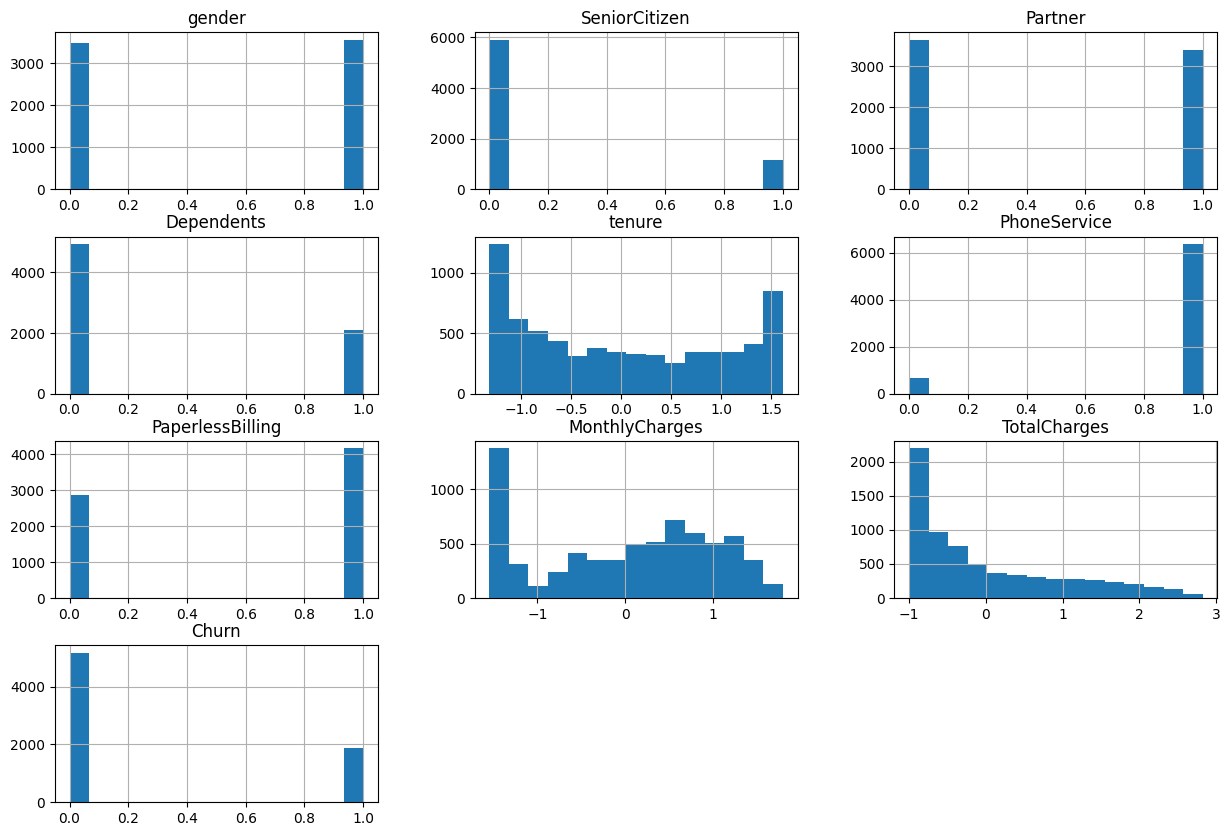

In [ ]:
df.hist(bins=15, figsize=(15, 10))
plt.show()

Box Plots to Identify Outliers

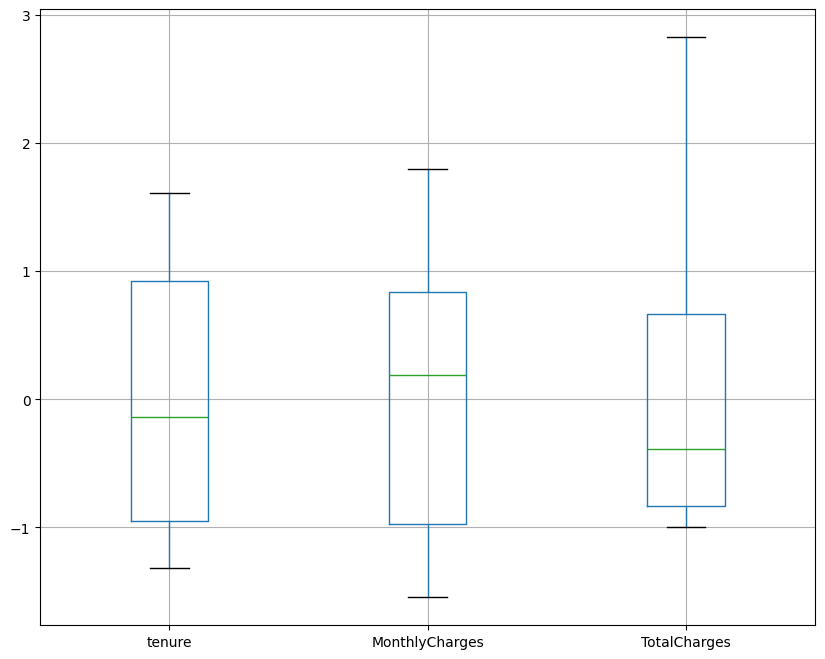

In [ ]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']  # example numerical columns
fig, ax = plt.subplots(figsize=(10, 8))
df.boxplot(column=numerical_cols)
plt.show()

Correlations Between Features

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                    gender  SeniorCitizen   Partner  Dependents    tenure  \
gender            1.000000      -0.001874 -0.001808    0.010517  0.005106   
SeniorCitizen    -0.001874       1.000000  0.016479   -0.211185  0.016567   
Partner          -0.001808       0.016479  1.000000    0.452676  0.379697   
Dependents        0.010517      -0.211185  0.452676    1.000000  0.159712   
tenure            0.005106       0.016567  0.379697    0.159712  1.000000   
PhoneService     -0.006488       0.008576  0.017706   -0.001762  0.008448   
PaperlessBilling -0.011754       0.156530 -0.014877   -0.111377  0.006152   
MonthlyCharges   -0.014569       0.220173  0.096848   -0.113890  0.247900   
TotalCharges      0.000048       0.102395  0.318812    0.064535  0.824757   
Churn            -0.008612       0.150889 -0.150448   -0.164221 -0.352229   

                  PhoneService  PaperlessBilling  MonthlyCharges  \
gender               -0.006488         -0.011754       -0.014569   
SeniorCitizen   

In [ ]:
correlation_matrix.to_csv('correlation_matrix.csv')
correlation_flattened = correlation_matrix.unstack()
sorted_correlation = correlation_flattened.sort_values(kind="quicksort", ascending=False)
sorted_correlation = sorted_correlation[sorted_correlation != 1]
print(sorted_correlation.head(20))

tenure            TotalCharges        0.824757
TotalCharges      tenure              0.824757
                  MonthlyCharges      0.650468
MonthlyCharges    TotalCharges        0.650468
Partner           Dependents          0.452676
Dependents        Partner             0.452676
Partner           tenure              0.379697
tenure            Partner             0.379697
MonthlyCharges    PaperlessBilling    0.352150
PaperlessBilling  MonthlyCharges      0.352150
TotalCharges      Partner             0.318812
Partner           TotalCharges        0.318812
MonthlyCharges    tenure              0.247900
tenure            MonthlyCharges      0.247900
PhoneService      MonthlyCharges      0.247398
MonthlyCharges    PhoneService        0.247398
SeniorCitizen     MonthlyCharges      0.220173
MonthlyCharges    SeniorCitizen       0.220173
Churn             MonthlyCharges      0.193356
MonthlyCharges    Churn               0.193356
dtype: float64


Scatter Plots to Visualize Relationships

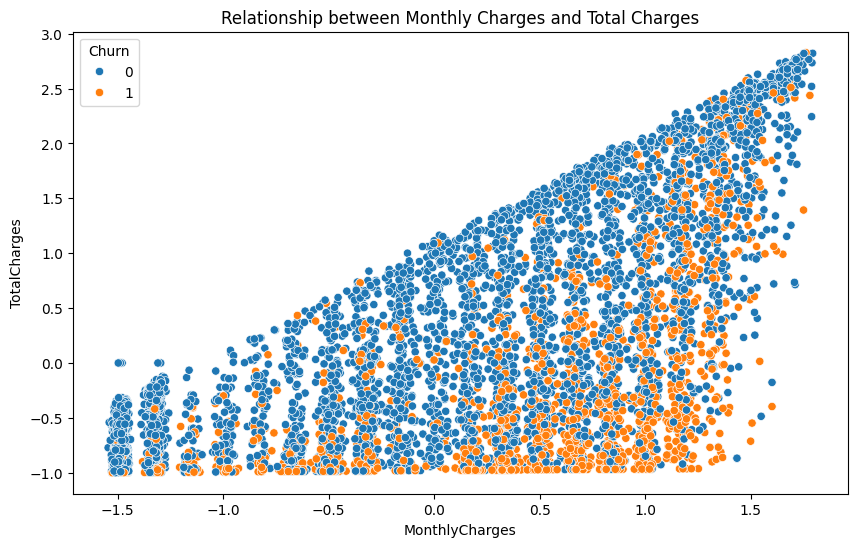

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df, hue='Churn')
plt.title('Relationship between Monthly Charges and Total Charges')
plt.show()